### 图像色彩
+ jpg图像分RGB三通道; png图像分RGBA四通道

In [2]:
import cv2 as cv

def color_space():
    image = cv.imread("../image/1.jpg")           # BGR(0~255)
    image = cv.resize(image, (300, 418))

    cv.imshow("image", image)
    cv.imwrite("../image/2.jpg", image)
    cv.waitKey(0)
    cv.destroyAllWindows()

if __name__ == "__main__":
    color_space()

In [ ]:
import cv2 as cv

def color_space():
    image = cv.imread("../image/balloon.jpg")           # BGR(0~255)
    image = cv.resize(image, (400, 300))
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)        # 转灰度图
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)          # 转hsv, H:0~180, S/V: 0~255

    cv.imshow("image", image)
    cv.imshow("gray", gray)
    cv.imshow("hsv", hsv)
    cv.waitKey(0)
    cv.destroyAllWindows()

if __name__ == "__main__":
    color_space()


### 图像对象创建与赋值
+ 一切图像皆numpy

In [13]:
import cv2 as cv
import numpy as np


image = cv.imread("../image/balloon.jpg", cv.IMREAD_GRAYSCALE)           # 读入图像时转成灰度图
image = cv.resize(image, (400, 300))
cv.imshow("image", image)
print(image.shape)
print(image)            # 300*400矩阵
print(image[0][0])

blank = np.zeros_like(image)    # 按照image大小创建一个空白图像, 0像素表示黑色
cv.imshow("blank", blank)


ori = cv.imread("../image/balloon.jpg")
ori = cv.resize(ori, (400, 300))
print(ori[0][0])                # 3个元素的列表

blank = np.zeros_like(ori)
blank[100:200, 100:200, :] = ori[100:200, 100:200, :]     # 长宽各截取[100,200)像素区域
cv.imshow("blank1", blank)

blank = np.copy(ori)        # 深拷贝
cv.imshow("blank2", blank)

cv.waitKey(0)
cv.destroyAllWindows()

(300, 400)
[[160 156 160 ... 141 141 140]
 [159 159 159 ... 140 141 141]
 [157 159 159 ... 141 142 142]
 ...
 [173 176 176 ... 150 150 150]
 [175 174 175 ... 151 150 151]
 [174 175 174 ... 149 151 150]]
160
[213 180 101]


### 图像像素的读写

In [1]:
import cv2 as cv
import numpy as np


image = cv.imread("../image/balloon.jpg")
image = cv.resize(image, (400, 300))
cv.imshow("image", image)

h, w, c = image.shape
for row in range(h):
    for col in range(w):
        b, g, r = image[row, col]       # 三通道分别对应B、G、R
        image[row, col] = (255-b, 255-g, 255-r)     # 像素取反

cv.imshow("opposite", image)
cv.imwrite("../image/balloon_opposite.jpg", image)  # 保存图片

cv.waitKey(0)
cv.destroyAllWindows()

### 图像像素的四则运算

In [4]:
import numpy as np
import cv2 as cv

image = cv.imread("../image/balloon.jpg")
image = cv.resize(image, (400, 300))
cv.imshow("image", image)

h, w, c = image.shape
blank = np.zeros_like(image)
blank[:, :] = (50, 50, 50)  # 每个像素的三个通道都设置为50

add = cv.add(image, blank)  # 两图相加(像素值相加)
cv.imshow("add", add)       # 提高亮度

sub = cv.subtract(image, blank) # 减
cv.imshow("sub", sub)       # 降低亮度

mul = cv.multiply(image, blank) # 乘, 结果>255越界, 变成全白
cv.imshow("mul", mul)

div = cv.divide(image, blank)   # 除, 结果接近0, 变成全黑
cv.imshow("div", div)

cv.waitKey(0)
cv.destroyAllWindows()

### TrackBar滚动条调整图像

In [2]:
import numpy as np
import cv2 as cv

def nothing(x):     # 随便一个函数
    return

image = cv.imread("../image/balloon.jpg")
image = cv.resize(image, (400, 300))

cv.namedWindow("image", cv.WINDOW_AUTOSIZE)
cv.createTrackbar("lightness", "image", 50, 100, nothing)    # 滑动块值设为0~100, 初始化为50

blank = np.zeros_like(image)
while True:
    pos = cv.getTrackbarPos("lightness", "image")       # 获得滑动块的位置
    blank[:, :] = (pos, pos, pos)
    # print(blank[:, :])
    image1 = cv.add(image, blank)
    cv.imshow("image1", image1)
    k = cv.waitKey(1)
    if k == 27:         # esc
        break           # 按esc退出


cv.destroyAllWindows()

In [15]:
import numpy as np
import cv2 as cv

image = cv.imread("../image/balloon.jpg")

cv.imshow("R", image[:, :, :])

cv.waitKey(0)
cv.destroyAllWindows()

### 利用像素位运算抠图
+ `cv.inRange()`
+ `cv.bitwise_not()`
+ `cv.bitwise_and()`

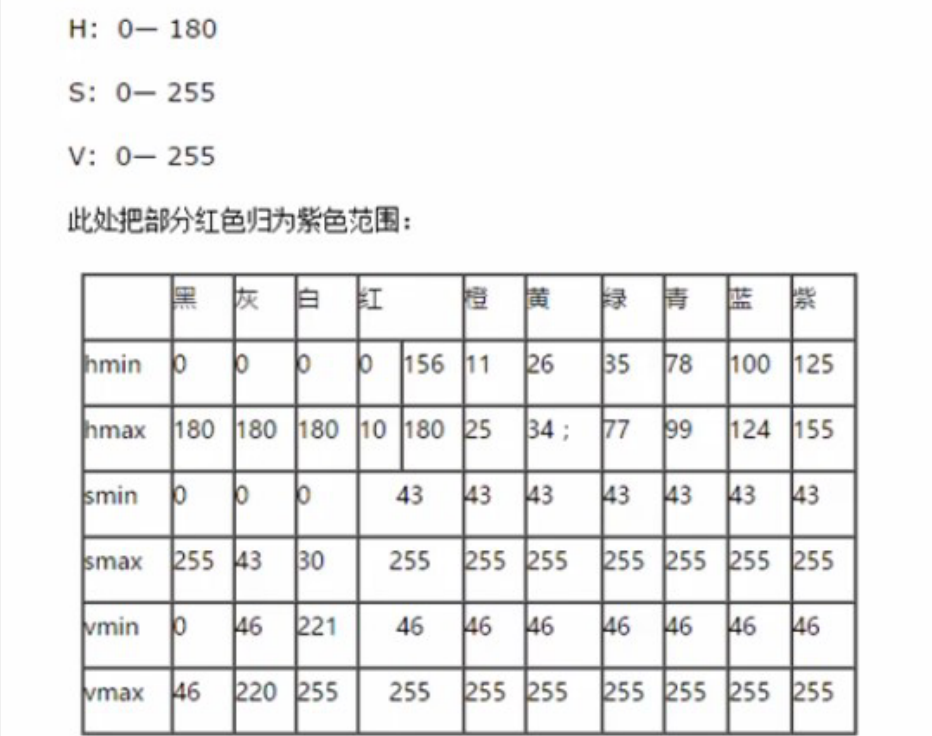

In [16]:
import cv2 as cv
import numpy as np

image = cv.imread("../image/balloon.jpg")
image = cv.resize(image, (400, 300))
cv.imshow("ori", image)

hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)      # 1. 转HSV
mask = cv.inRange(hsv, (100, 43, 46), (124, 255, 255))  # 2. 取图像中蓝色部分
mask = cv.bitwise_not(mask, mask)      # 非
res = cv.bitwise_and(image, image, mask=mask)
cv.imshow("result", res)


cv.waitKey(0)
cv.destroyAllWindows()

### 图像中绘制图形
+ `cv.rectangle(图, 左上角坐标, 右下角坐标, 颜色, 线宽, lineType, shift)`
+ `cv.circle(图, 圆心, 半径, 颜色, 线宽, lineType, shift)`
+ `cv.line(图, 起点, 终点, ...)`
+ `cv.putText()`

In [31]:
import cv2 as cv
import numpy as np

blank = np.zeros((300, 400, 3), dtype=np.uint8)     # 全黑图像
cv.rectangle(blank, (50, 50), (200, 200), (0, 0, 255), 2)   # 左上角(50, 50), 右下角(200, 200), 红色线框, 线宽为2
cv.imshow("r1", blank)

cv.rectangle(blank, (50, 50), (200, 200), (0, 0, 255), -1)   # 左上角(50, 50), 右下角(200, 200), 红色线框, 线宽<0表示填充
cv.imshow("r2", blank)

cv.circle(blank, (200, 150), 100, (0, 255, 0), 2)
cv.imshow("r3", blank)

cv.line(blank, (100, 50), (400, 300), (255, 0, 0), 2)
cv.imshow("r4", blank)

cv.putText(blank, "Happy 99%", (200, 200), cv.FONT_ITALIC, 0.5, (255, 255, 0), 1)
cv.imshow("r5", blank)

cv.waitKey(0)
cv.destroyAllWindows()

#### 利用随机数绘图

In [ ]:
import cv2 as cv
import numpy as np

blank = np.zeros((300, 400, 3), dtype=np.uint8)     # 全黑图像
while True:
    x = np.random.randint(0, 512, 2, dtype=np.uint)         # 随机x坐标
    y = np.random.randint(0, 512, 2, dtype=np.uint)         # 随机y坐标
    color = np.random.randint(0, 255, 3, dtype=np.uint)    # 随机颜色(B, G, R)

    cv.line(blank, (x[0], y[0]), (x[1], y[1]), (np.int(color[0]), np.int(color[1]), np.int(color[2])), 1)
    cv.imshow("result", blank)

    c = cv.waitKey(10)
    if c == 27:     # 按下esc键退出
        break   

cv.destroyAllWindows()

### 鼠标操作与响应
+ `cv.setMouseCallback()`
+ `cv.namedWindow()`

In [ ]:
import numpy as np
import cv2 as cv

image = cv.imread("../image/balloon.jpg")
image = cv.resize(image, (400, 300))
ori = np.copy(image)

x1, x2, y1, y2 = -1, -1, -1, -1
def fun(event, x, y, flags, param):     # 事件响应函数, 需要固定的参数
    # print(x, y)         # 输出鼠标位置
    global x1, x2, y1, y2, image, ori
    if event == cv.EVENT_LBUTTONDOWN:   # 按下左键
        print(x, y)
        x1, y1 = x, y
    if event == cv.EVENT_LBUTTONUP:     # 左键抬起
        print(x, y)
        
        x1, x2, y1, y2 = -1, -1, -1, -1
    if event == cv.EVENT_MOUSEMOVE:     # 鼠标移动
        x2, y2 = x, y
        image[:, :, :] = ori[:, :, :]   # 恢复原图
        if x1 > 0 and y1 > 0:           # 起点不是(-1,-1)就绘图
            cv.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2) # 画矩形

        
        


cv.namedWindow("demo", cv.WINDOW_AUTOSIZE)      # 创建一个窗口
cv.setMouseCallback("demo", fun)                # 连接到创建的窗口

while True:                                     # 不断更新图像
    cv.imshow("demo", image)                    # 在自建的窗口中显示image
    c = cv.waitKey(1)
    if c == 27:
        break

cv.destroyAllWindows()

### 像素值归一化
+ opencv既能显示像素值[0,255]的图像，也能显示[0,1]的图像

In [19]:
import cv2 as cv
import numpy as np

image = cv.imread("../image/balloon.jpg")
image = cv.resize(image, (400, 300))
cv.imshow("image", image)
# print(image)

image = image / 255.0               # 归一化
cv.imshow("image1", image)        

try:
    normalized = np.zeros_like(np.float32(image))
    cv.normalize(np.float32(image), normalized, 0, 1, cv.NORM_MINMAX, dtype=cv.CV_32F)  # 归一化函数
    cv.imshow("normalized", normalized)
except:
    pass
cv.waitKey(0)
cv.destroyAllWindows()

### 图像缩放与插值
+ `cv.resize()`

In [2]:
import numpy as np
import cv2 as cv

image = cv.imread("../image/balloon.jpg")
cv.imshow("image", image)
h, w, c = image.shape

cv.namedWindow("resize", cv.WINDOW_AUTOSIZE)
dst = cv.resize(image, (w*2, h*2), interpolation=cv.INTER_NEAREST)

cv.imshow("resize", dst)

cv.waitKey(0)
cv.destroyAllWindows()

### 图像翻转
+ `cv.flip()`

In [ ]:
import numpy as np
import cv2 as cv

image = cv.imread("../image/balloon.jpg")
image = cv.resize(image, (400, 300))
cv.imshow("ori", image)

flip = cv.flip(image, 1)             # 翻转(0:上下, 1:左右, -1:对角线)
cv.imshow("flip", flip)

cv.waitKey(0)
cv.destroyAllWindows()

### 视频/摄像头调用
+ `cv.VideoCapture()`

In [8]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)            # 0表示摄像头; 或者填视频路径
cap1 = cv.VideoCapture("D:/文件夹/Video/雷神4.mp4")
while True:
    ret, frame = cap1.read()        # 读入视频帧, 返回(True/False, 帧图像)的元组（图像为numpy数组）
    frame = cv.flip(frame, 1)       # 左右翻转
    print(type(frame))
    if ret is True:
        cv.imshow("frame", frame)
        c = cv.waitKey(1)
        if c == 27:
            break
cv.destroyAllWindows()


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

### 直方图
+ `cv.calcHist()`

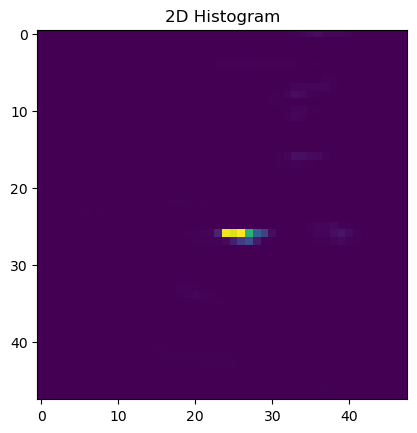

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def image_hist():                   # 一维直方图
    image = cv.imread("../image/balloon.jpg")
    cv.imshow("image", image)
    color = ('blue', 'green', 'red')
    for i, color in enumerate(color):
        hist = cv.calcHist([image], [i], None, [256], [0, 256])
        print(hist)
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()
    cv.waitKey(0)
    cv.detail_GraphCutSeamFinder()

def image_hist2d():                 # 二维直方图
    image = cv.imread("../image/balloon.jpg")
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hist = cv.calcHist([hsv], [0, 1], None, [48, 48], [0, 180, 0, 256])     # 两个维度, 范围分别是[0, 180)和[0, 256)
    dst = cv.resize(hist, (400, 400))
    cv.normalize(dst, dst, 0, 255, cv.NORM_MINMAX)
    cv.imshow("image", image)
    dst = cv.applyColorMap(np.uint8(dst), cv.COLORMAP_JET)
    cv.imshow("hist", dst)
    plt.imshow(hist, interpolation="nearest")
    plt.title("2D Histogram")
    plt.show()
    cv.waitKey(0)
    cv.destroyAllWindows()


image_hist2d()

### 图像卷积运算
+ `cv.blur()`

In [2]:
import numpy as np
import cv2 as cv

def image_conv():
    image = cv.imread("../image/balloon.jpg", cv.IMREAD_GRAYSCALE)
    cv.imshow("image", image)
    conv = cv.blur(image, (5, 5))       # 随机5*5卷积核
    cv.imshow("conv", conv)
    cv.waitKey(0)
    cv.destroyAllWindows()

image_conv()